In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np

# Read in data

In [120]:
results_2222 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed2222.gz')
results_3333 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed3333.gz')
results_4444 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed4444.gz')
results_5555 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed5555.gz')
results_6666 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed6666.gz')


In [121]:
experiments_2222, outcomes_2222 = results_2222
experiments_3333, outcomes_3333 = results_3333
experiments_4444, outcomes_4444 = results_4444
experiments_5555, outcomes_5555 = results_5555
experiments_6666, outcomes_6666 = results_6666

In [122]:
experiments_2222.keys()

Index(['TA1', 'TA2', 'TA3', 'scenario', 'policy', 'model'], dtype='object')

In [123]:
outcomes_2222.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var'])

In [124]:
outcomes_2222['continuity_var'] = outcomes_2222['continuity_vars']
outcomes_3333['continuity_var'] = outcomes_3333['continuity_vars']
outcomes_4444['continuity_var'] = outcomes_4444['continuity_vars']
outcomes_5555['continuity_var'] = outcomes_5555['continuity_vars']
outcomes_6666['continuity_var'] = outcomes_6666['continuity_vars']

outcomes_2222['connectivity_var'] = outcomes_2222['connectivity_vars']
outcomes_3333['connectivity_var'] = outcomes_3333['connectivity_vars']
outcomes_4444['connectivity_var'] = outcomes_4444['connectivity_vars']
outcomes_5555['connectivity_var'] = outcomes_5555['connectivity_vars']
outcomes_6666['connectivity_var'] = outcomes_6666['connectivity_vars']

In [125]:
outcomes_2222.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var', 'continuity_var', 'connectivity_var'])

In [126]:
outcomes_2222.pop('continuity_vars')
outcomes_3333.pop('continuity_vars')
outcomes_4444.pop('continuity_vars')
outcomes_5555.pop('continuity_vars')
outcomes_6666.pop('continuity_vars')

outcomes_2222.pop('connectivity_vars')
outcomes_3333.pop('connectivity_vars')
outcomes_4444.pop('connectivity_vars')
outcomes_5555.pop('connectivity_vars')
outcomes_6666.pop('connectivity_vars')

array([1.36046005, 1.42047321, 1.01048129, 1.17511042, 1.16766408,
       0.87478095, 1.33900338, 0.78630032, 1.30607456, 1.25591077,
       1.61032113, 1.12309577, 1.2700418 , 0.69715245, 0.6744656 ,
       0.72631256, 1.86365566, 1.03654912, 1.21056491, 1.12554969,
       1.29747895, 0.78464408, 1.32654219, 0.65065441, 1.29588041,
       1.49754253, 1.76836163, 0.83897801, 1.37175324, 1.28464741,
       0.90781075, 1.08294949, 0.97946818, 0.904975  , 0.68539278,
       0.92638184, 1.34897909, 1.55955581, 0.72297923, 1.16072214,
       1.06268008, 1.17141284, 1.74717252, 1.60598555, 0.70946516,
       1.53929837, 1.08908387, 1.29908415, 1.45111754, 1.34542112,
       1.55283257, 1.86376685, 2.16539163, 1.01547175, 1.56733407,
       0.61264211, 0.83444917, 1.06745633, 1.64391455, 0.88221232,
       0.85250748, 0.75365487, 1.08340451, 1.32838981, 0.97558149,
       1.0391818 , 0.65475927, 1.04436857, 0.74398599, 1.36832038,
       0.9752806 , 1.38552345, 1.54665782, 1.31209846, 0.62715

In [127]:
outcomes_2222.keys()

dict_keys(['continuity_mean', 'connectivity_mean', 'node_frequency_mean', 'node_frequency_var', 'continuity_var', 'connectivity_var'])

In [128]:
outcomes_change = outcomes_2222

In [130]:
outcomes_2222 = {}
outcomes_2222["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_2222["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_2222["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_2222["continuity_var"] = outcomes_change['continuity_var']
outcomes_2222["node_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_2222["node_frequency_var"] = outcomes_change['node_frequency_var']

In [132]:
outcomes_change = outcomes_3333
outcomes_3333 = {}
outcomes_3333["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_3333["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_3333["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_3333["continuity_var"] = outcomes_change['continuity_var']
outcomes_3333["node_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_3333["node_frequency_var"] = outcomes_change['node_frequency_var']

In [133]:
outcomes_change = outcomes_4444
outcomes_4444 = {}
outcomes_4444["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_4444["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_4444["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_4444["continuity_var"] = outcomes_change['continuity_var']
outcomes_4444["node_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_4444["node_frequency_var"] = outcomes_change['node_frequency_var']

In [134]:
outcomes_change = outcomes_5555
outcomes_5555 = {}
outcomes_5555["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_5555["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_5555["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_5555["continuity_var"] = outcomes_change['continuity_var']
outcomes_5555["node_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_5555["node_frequency_var"] = outcomes_change['node_frequency_var']

In [135]:
outcomes_change = outcomes_6666
outcomes_6666 = {}
outcomes_6666["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_6666["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_6666["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_6666["continuity_var"] = outcomes_change['continuity_var']
outcomes_6666["node_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_6666["node_frequency_var"] = outcomes_change['node_frequency_var']

## Code for making histograms

In [8]:
def make_histogram_full(outcome):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    histogram = pd.Series(outcome.get("continuity_mean"))
    axs[0, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 0].set_title("Continuity_mean")
    axs[0, 0].set_xlabel('Value')
    axs[0, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("continuity_vars"))
    axs[0, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 1].set_title("Continuity_vars")
    axs[0, 1].set_xlabel('Value')
    axs[0, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_mean"))
    axs[1, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 0].set_title("Connectivity_mean")
    axs[1, 0].set_xlabel('Value')
    axs[1, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_vars"))
    axs[1, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 1].set_title("Connectivity_vars")
    axs[1, 1].set_xlabel('Value')
    axs[1, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("node_frequency_mean"))
    axs[2, 0].hist(histogram, bins=20, rwidth=0.9,
                          color='#607c8e')
    axs[2, 0].set_title("node_frequency_mean")
    axs[2, 0].set_xlabel('Value')
    axs[2, 0].set_ylabel('Frequency')


    histogram = pd.Series(outcome.get("node_frequency_var"))
    axs[2, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[2, 1].set_title("node_frequency_vars")
    axs[2, 1].set_xlabel('Value')
    axs[2, 1].set_ylabel('Frequency')

## Feature importance and plotting outcomes per seed

### Seed 2222

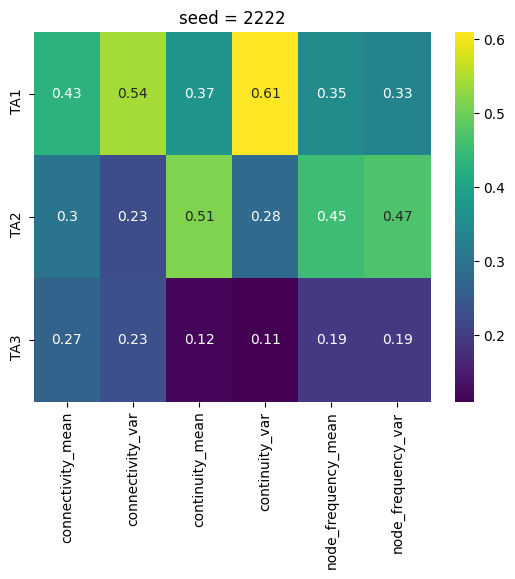

In [131]:
fs = feature_scoring.get_feature_scores_all(experiments_2222[['TA1', 'TA2', 'TA3']], outcomes_2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 2222")
plt.savefig('TA_ETRF_seed2222.png', bbox_inches='tight')

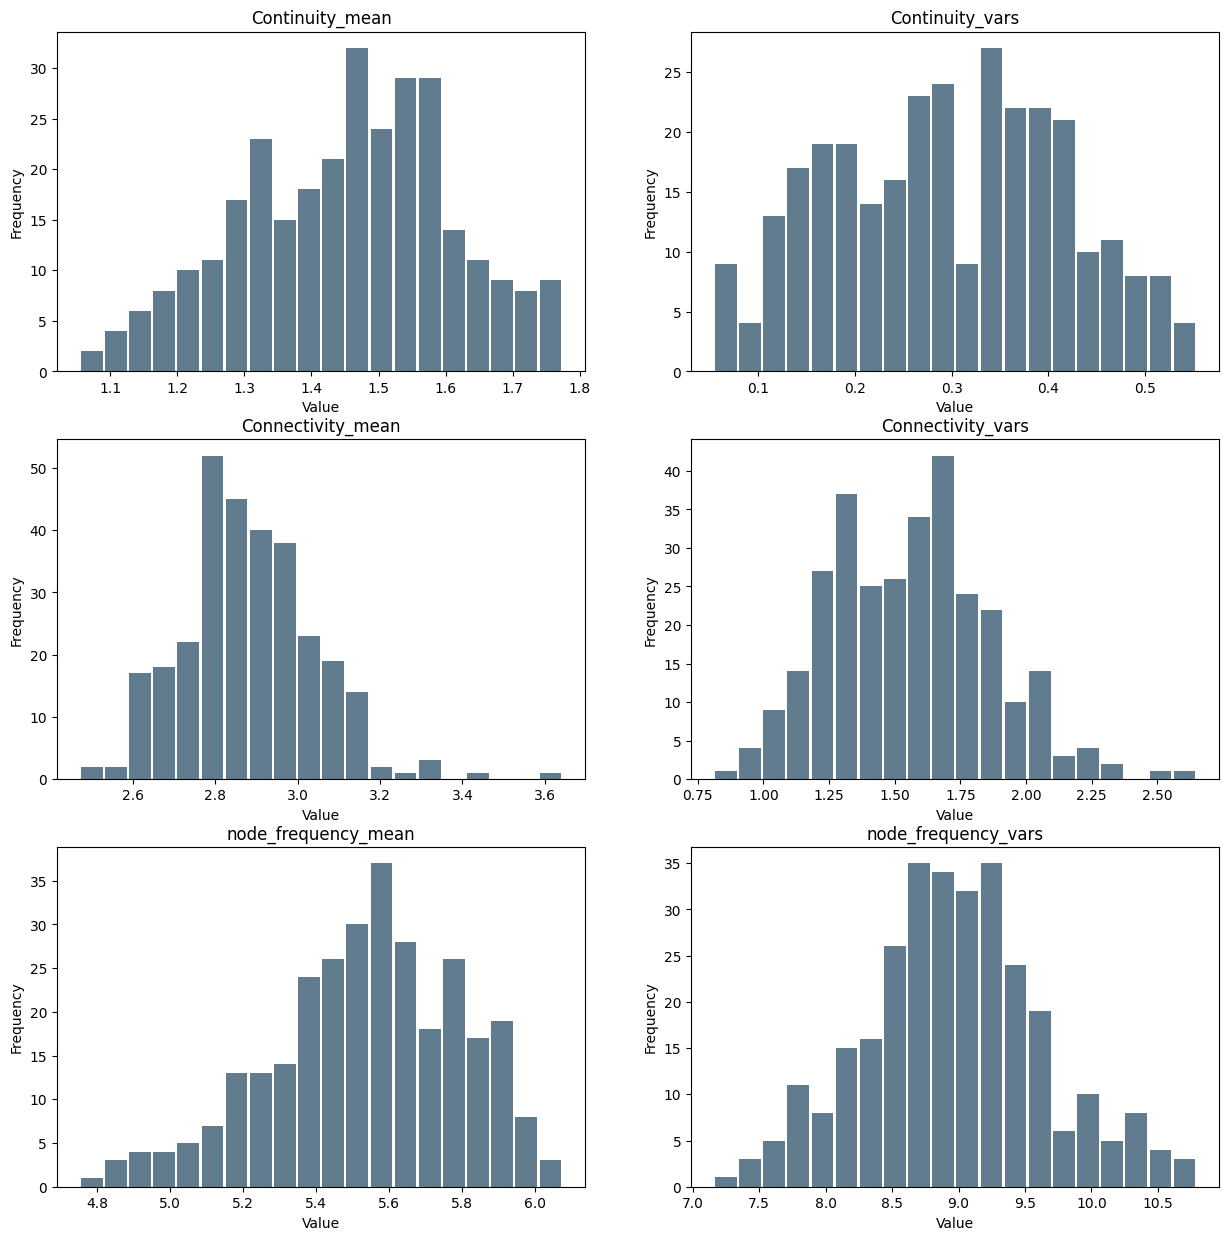

In [43]:
make_histogram_full(outcomes_2222)

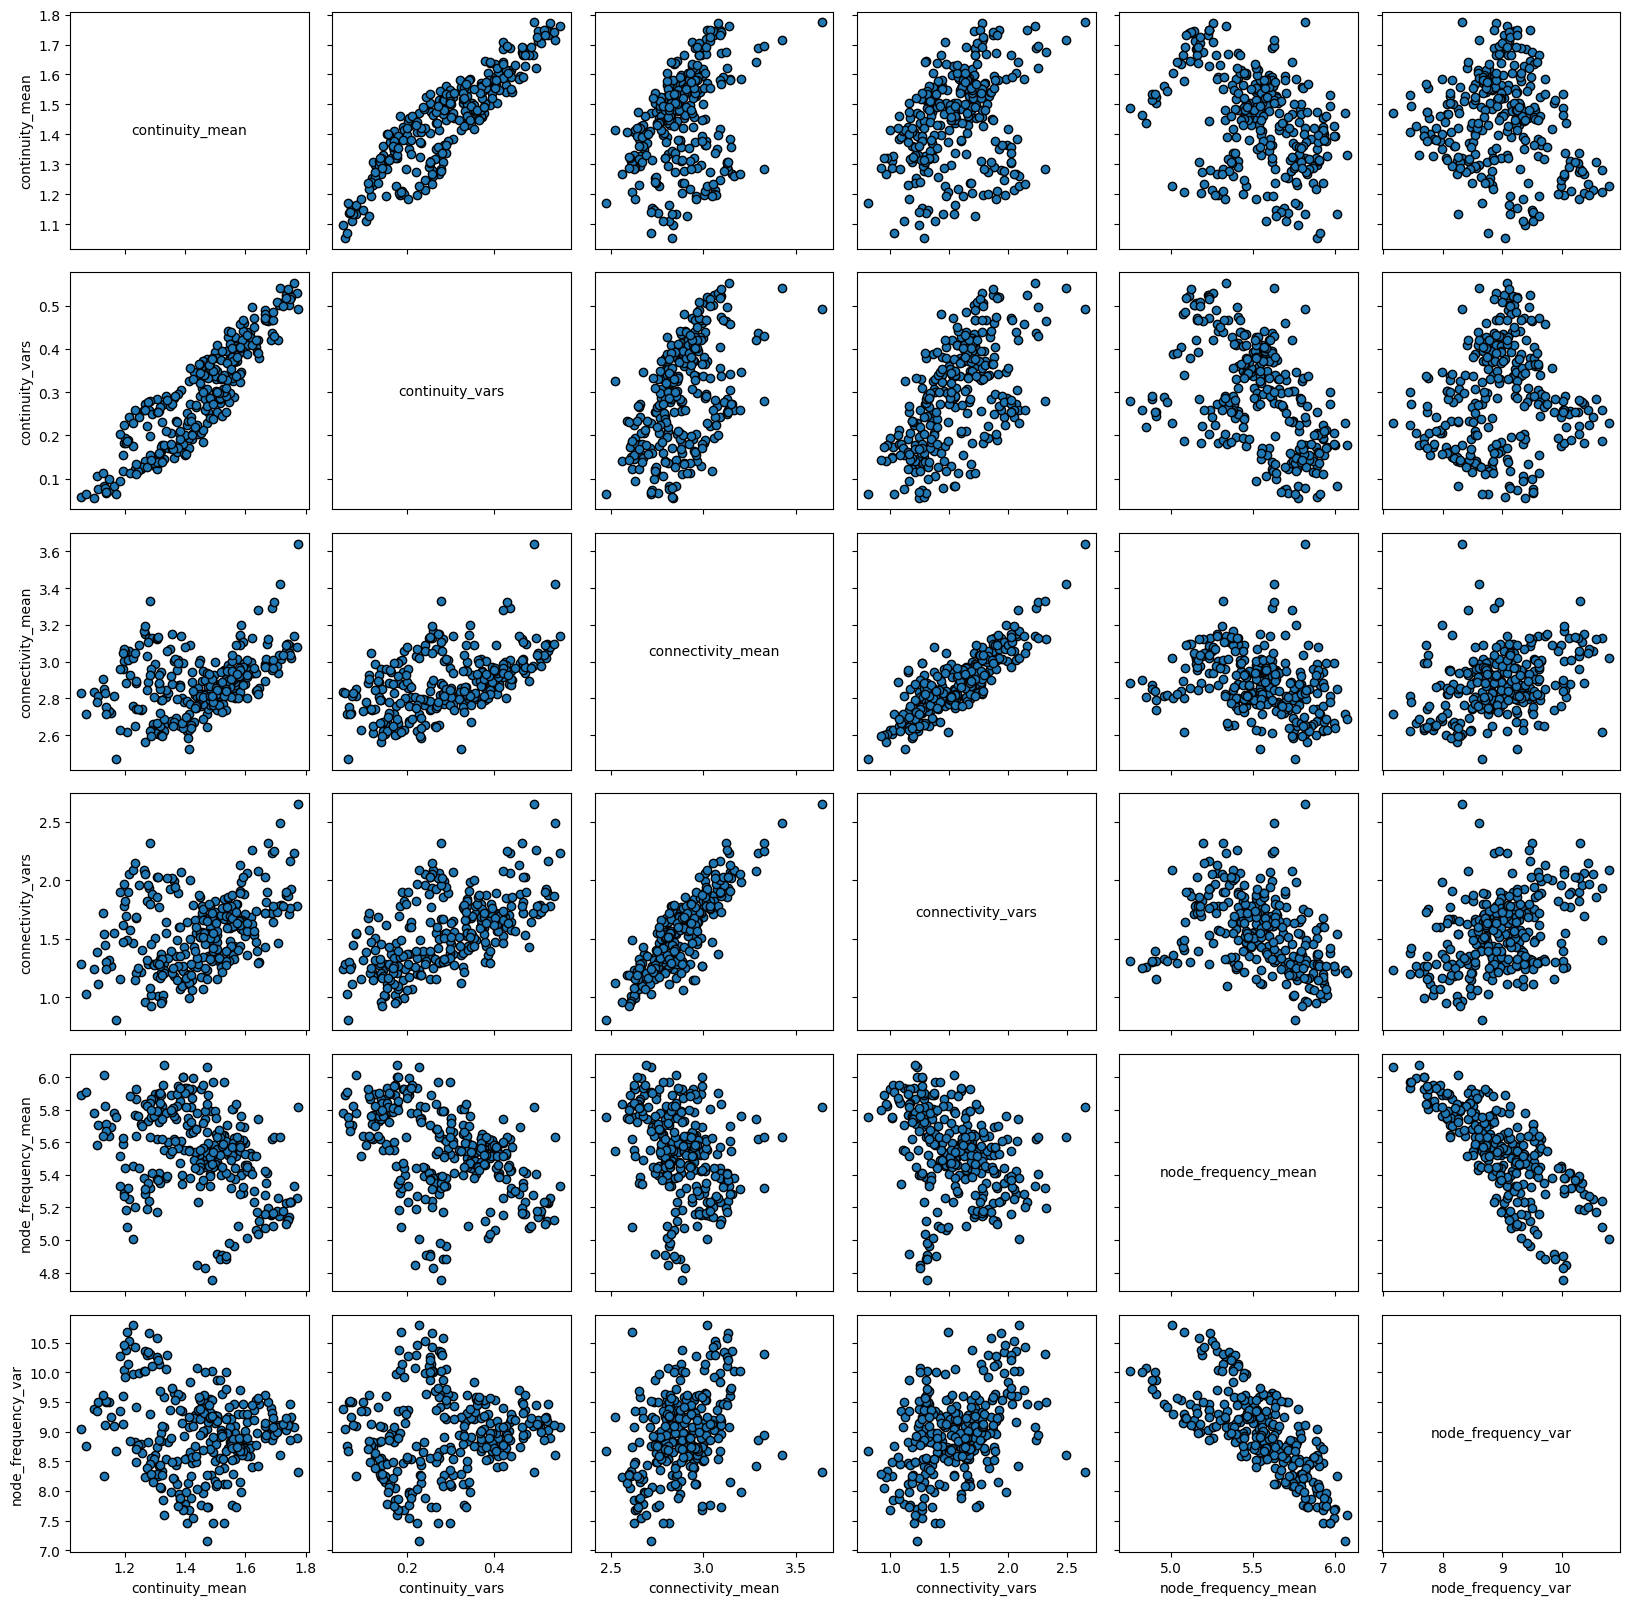

In [49]:
fig, axes = pairs_plotting.pairs_scatter(experiments_2222, outcomes_2222, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### Seed 3333

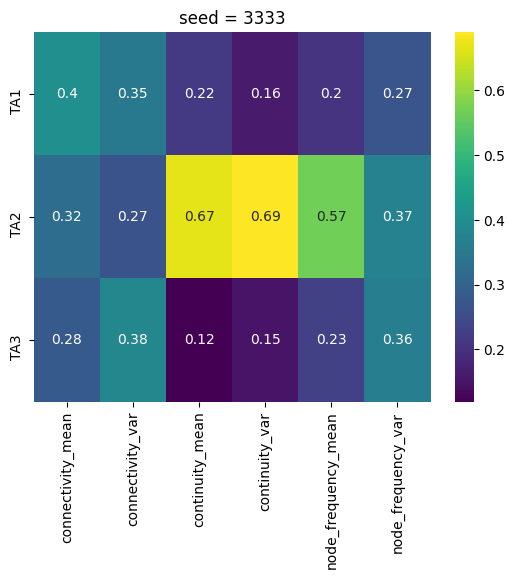

In [136]:
fs = feature_scoring.get_feature_scores_all(experiments_3333[['TA1', 'TA2', 'TA3']], outcomes_3333)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 3333")
plt.savefig('TA_ETRF_seed3333.png', bbox_inches='tight')

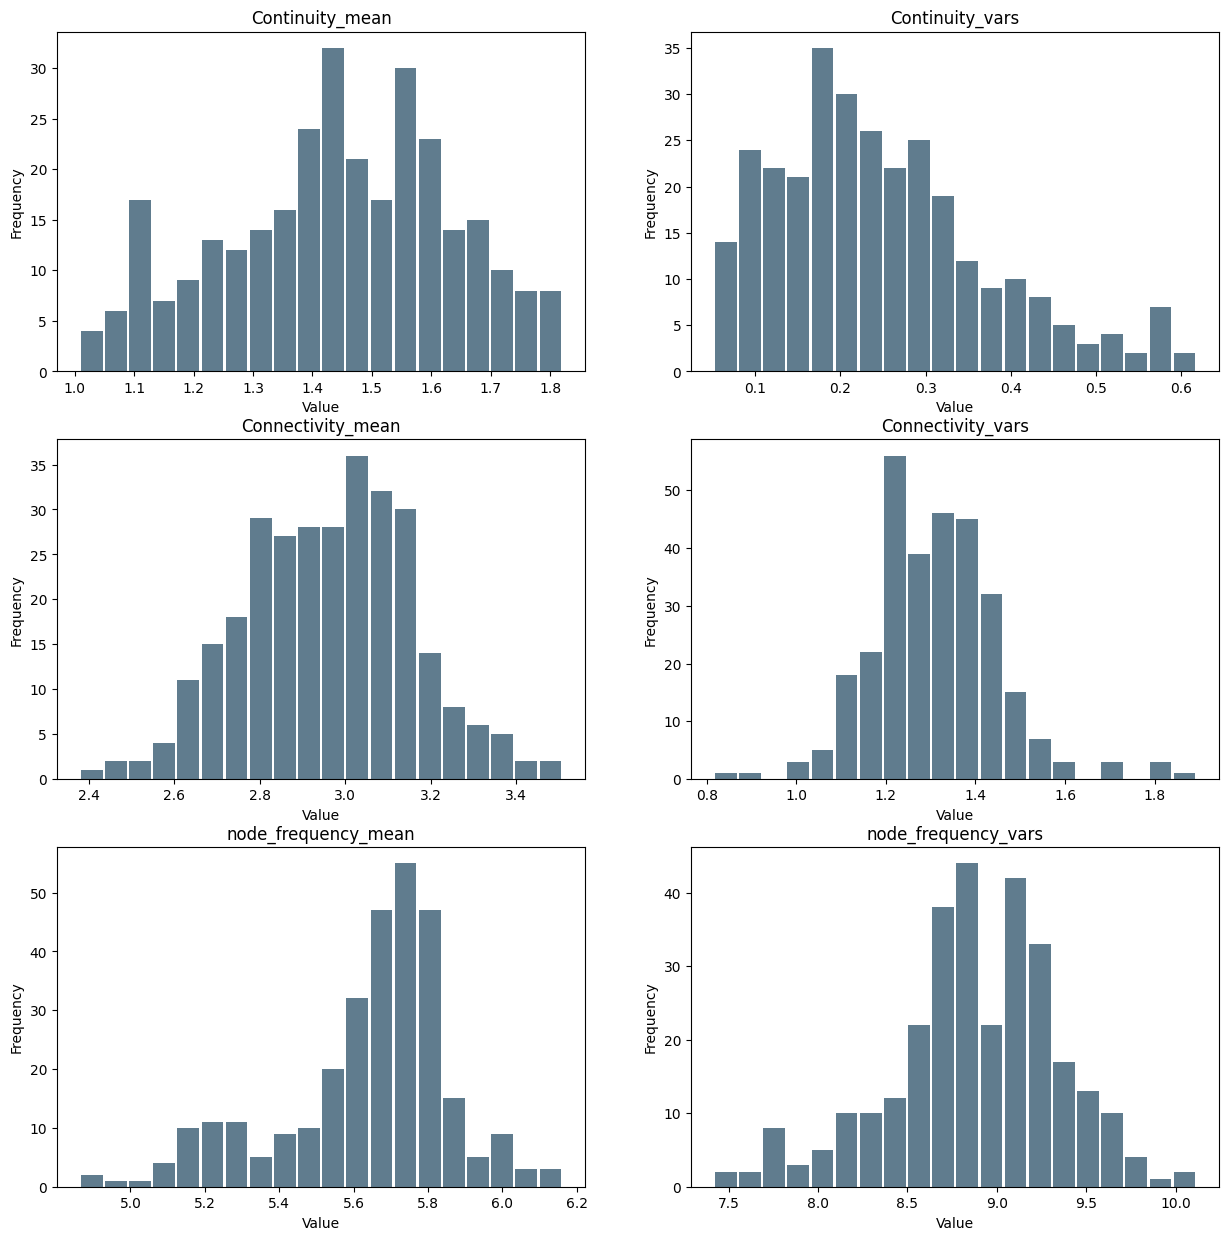

In [44]:
make_histogram_full(outcomes_3333)

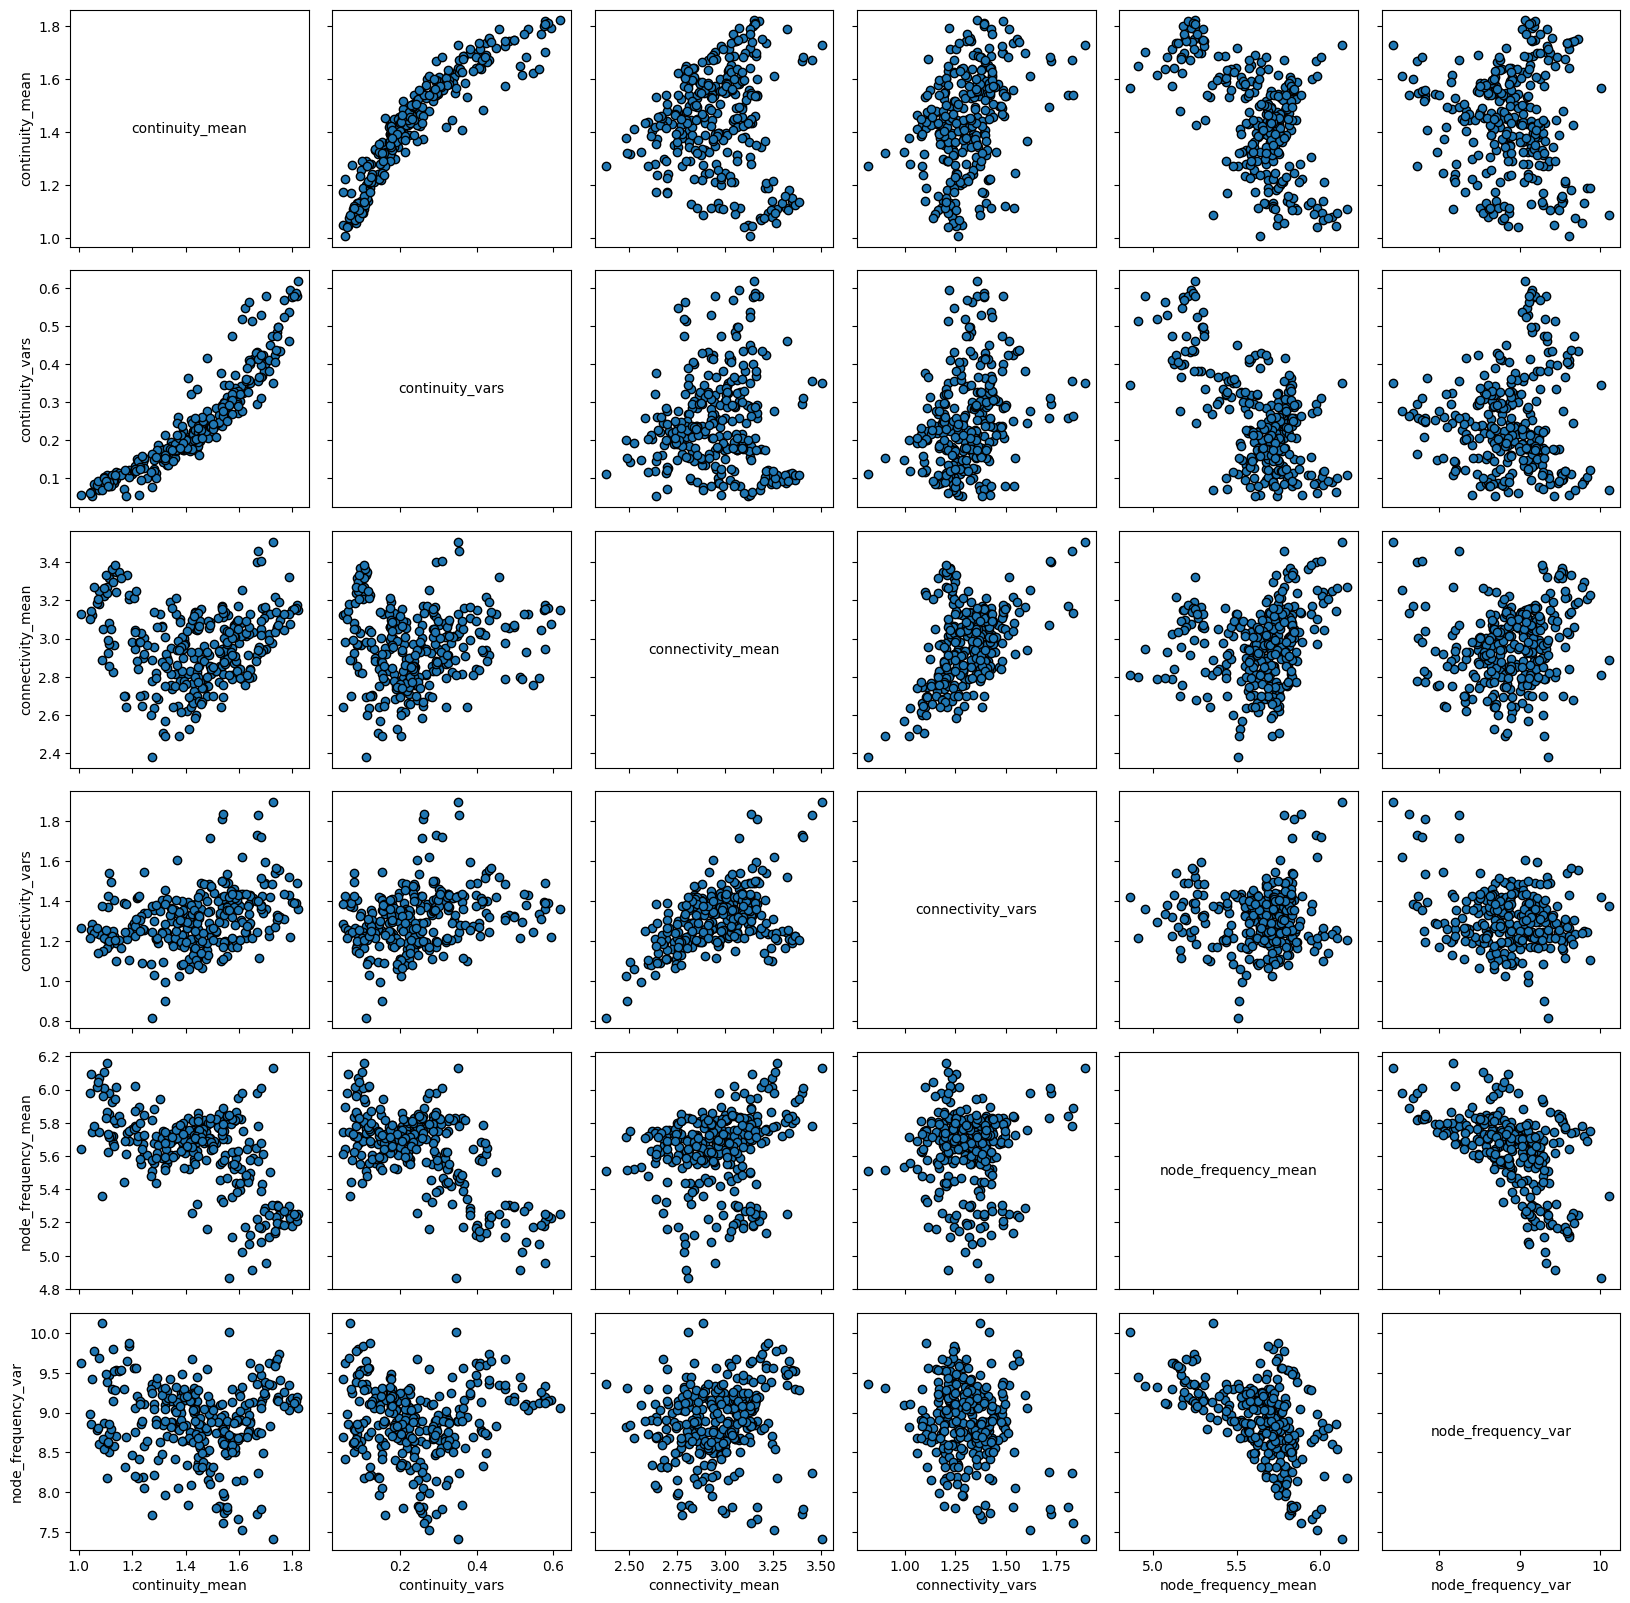

In [50]:
fig, axes = pairs_plotting.pairs_scatter(experiments_3333, outcomes_3333, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### Seed 4444

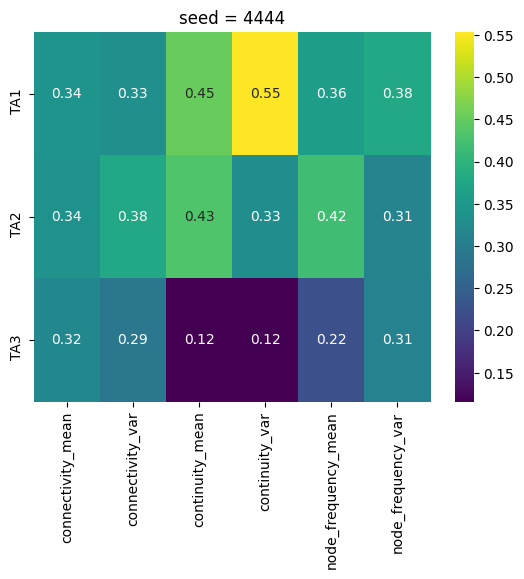

In [137]:
fs = feature_scoring.get_feature_scores_all(experiments_4444[['TA1', 'TA2', 'TA3']], outcomes_4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 4444")
plt.savefig('TA_ETRF_seed4444.png', bbox_inches='tight')

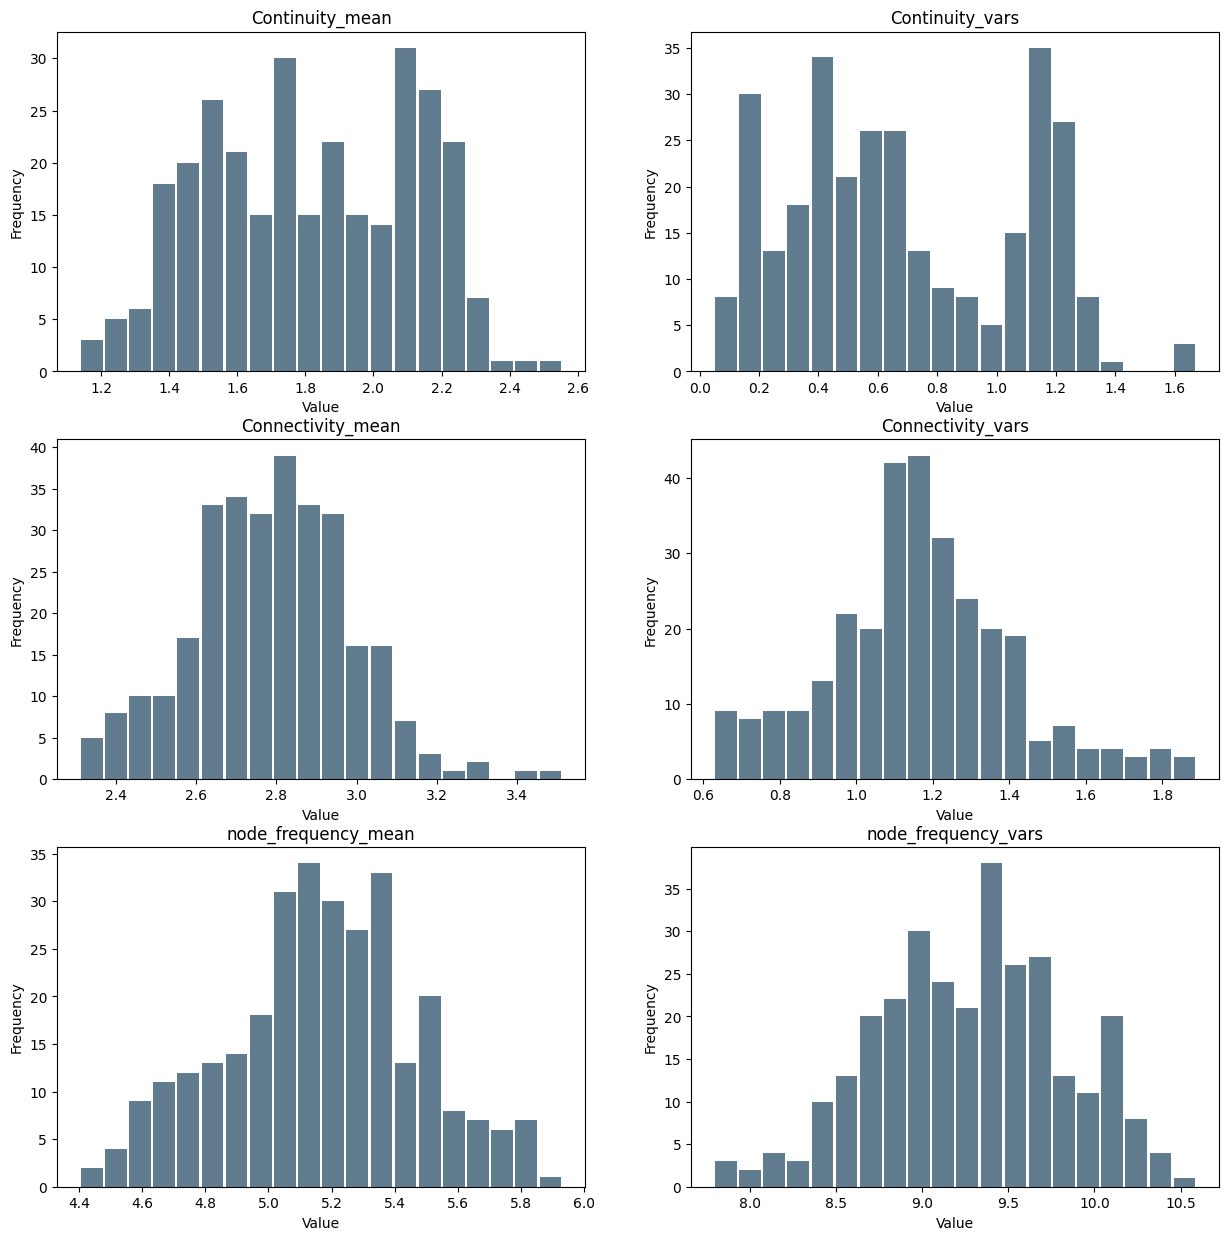

In [45]:
make_histogram_full(outcomes_4444)

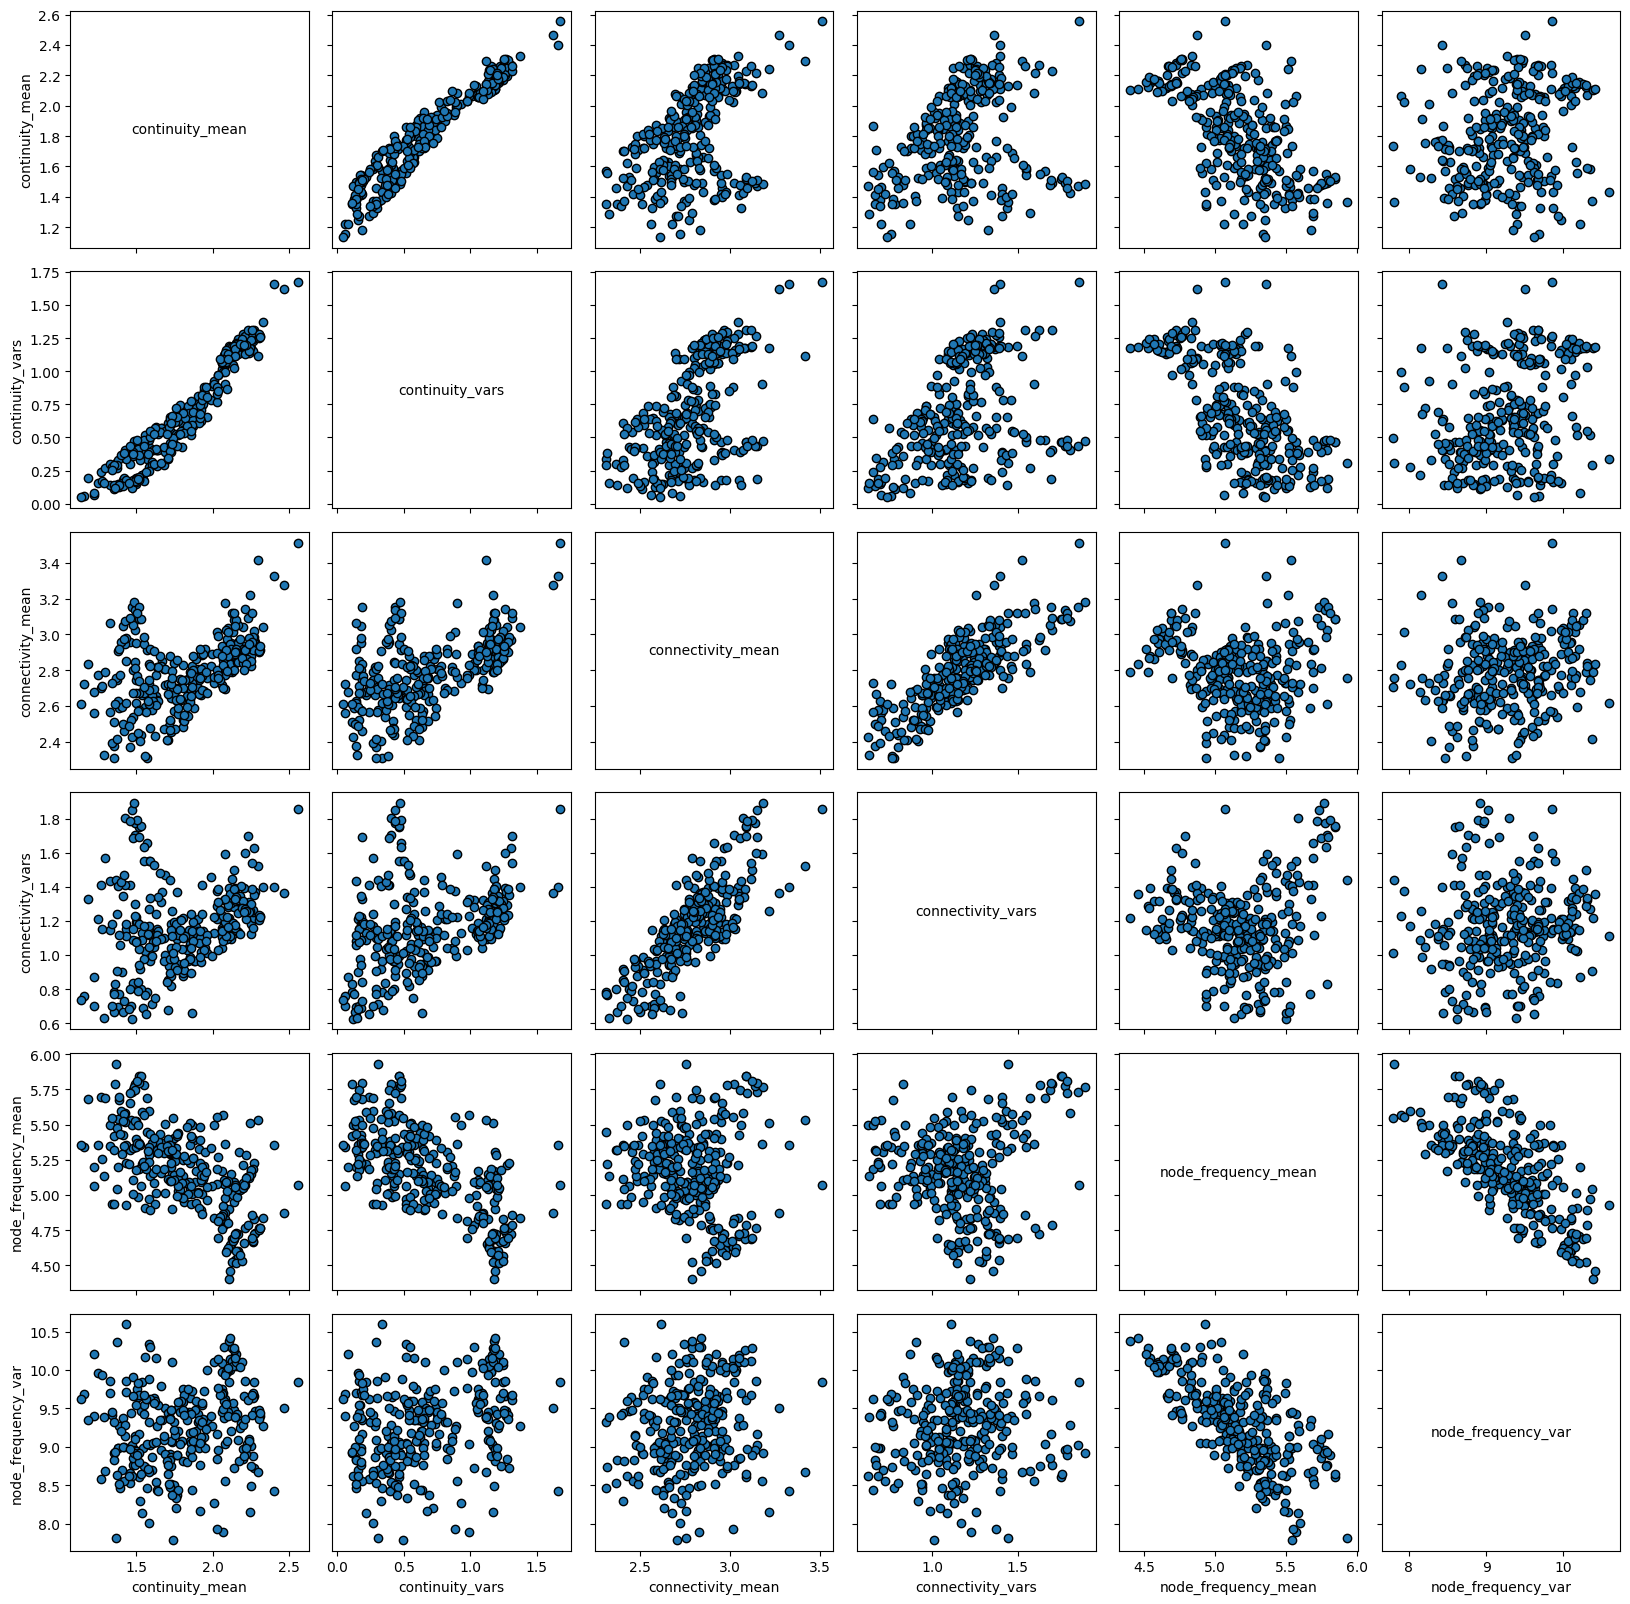

In [51]:
fig, axes = pairs_plotting.pairs_scatter(experiments_4444, outcomes_4444, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### Seed 5555

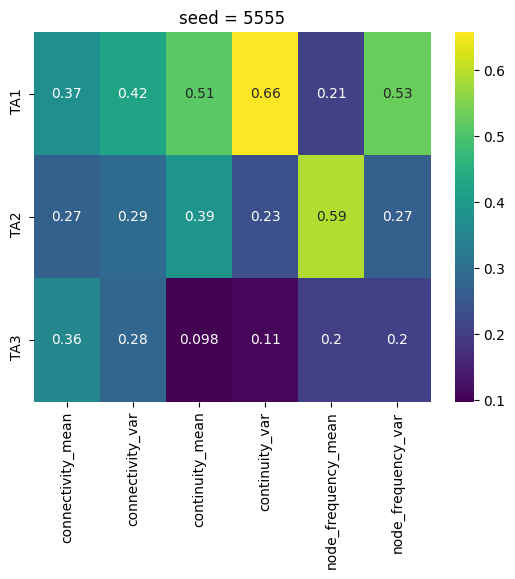

In [138]:
fs = feature_scoring.get_feature_scores_all(experiments_5555[['TA1', 'TA2', 'TA3']], outcomes_5555)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 5555")
plt.savefig('TA_ETRF_seed5555.png', bbox_inches='tight')

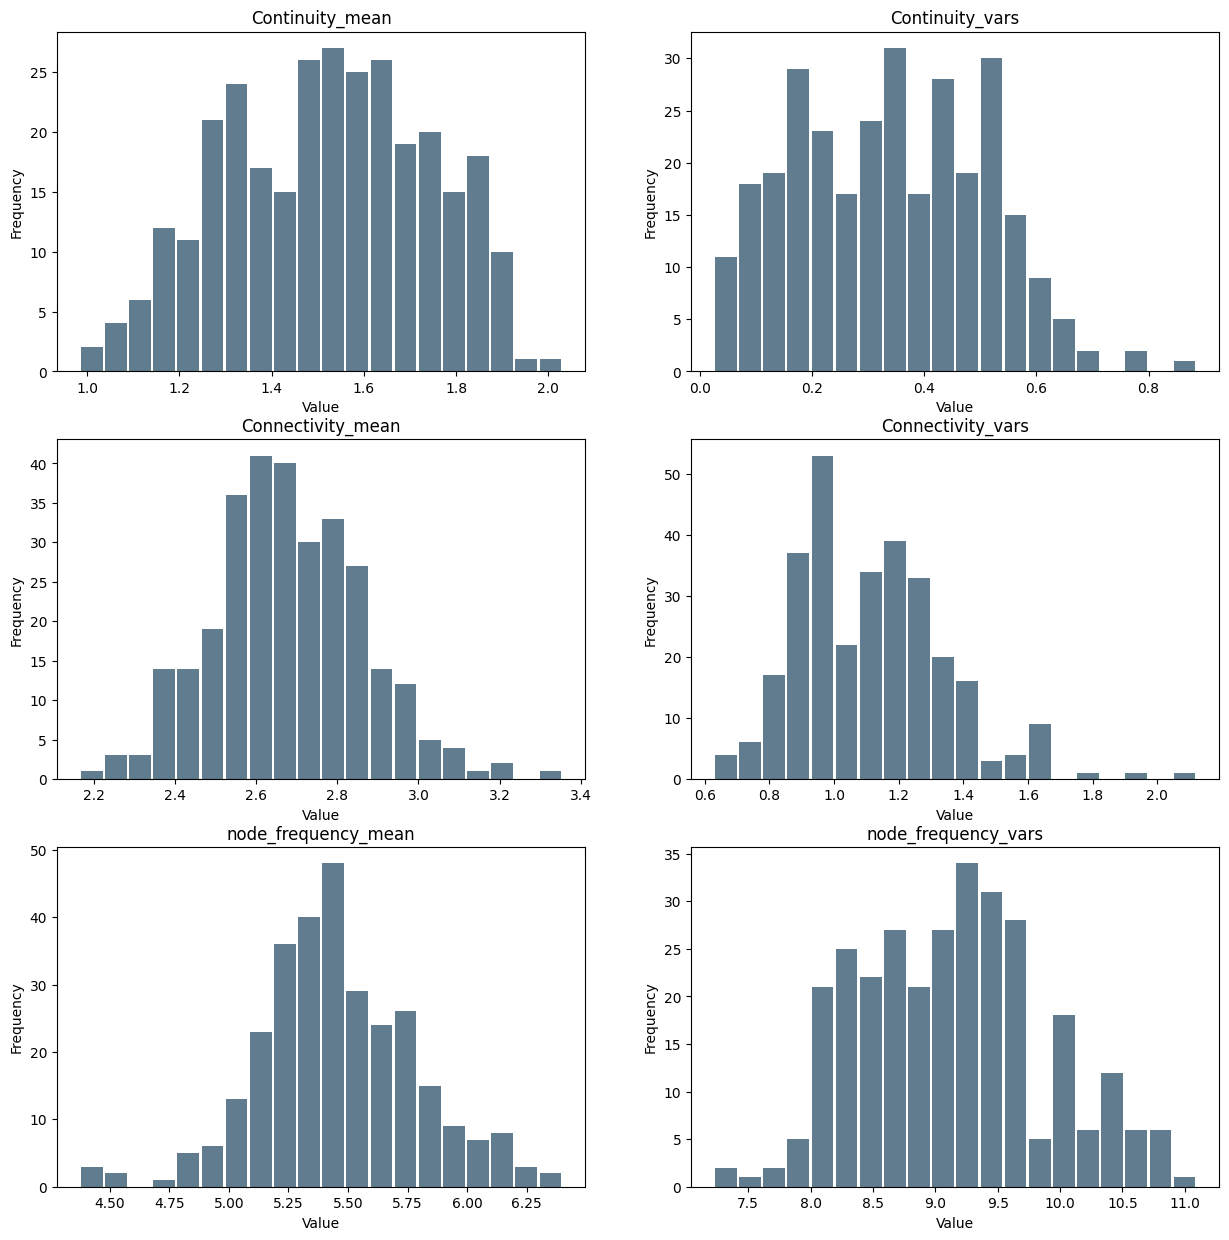

In [46]:
make_histogram_full(outcomes_5555)

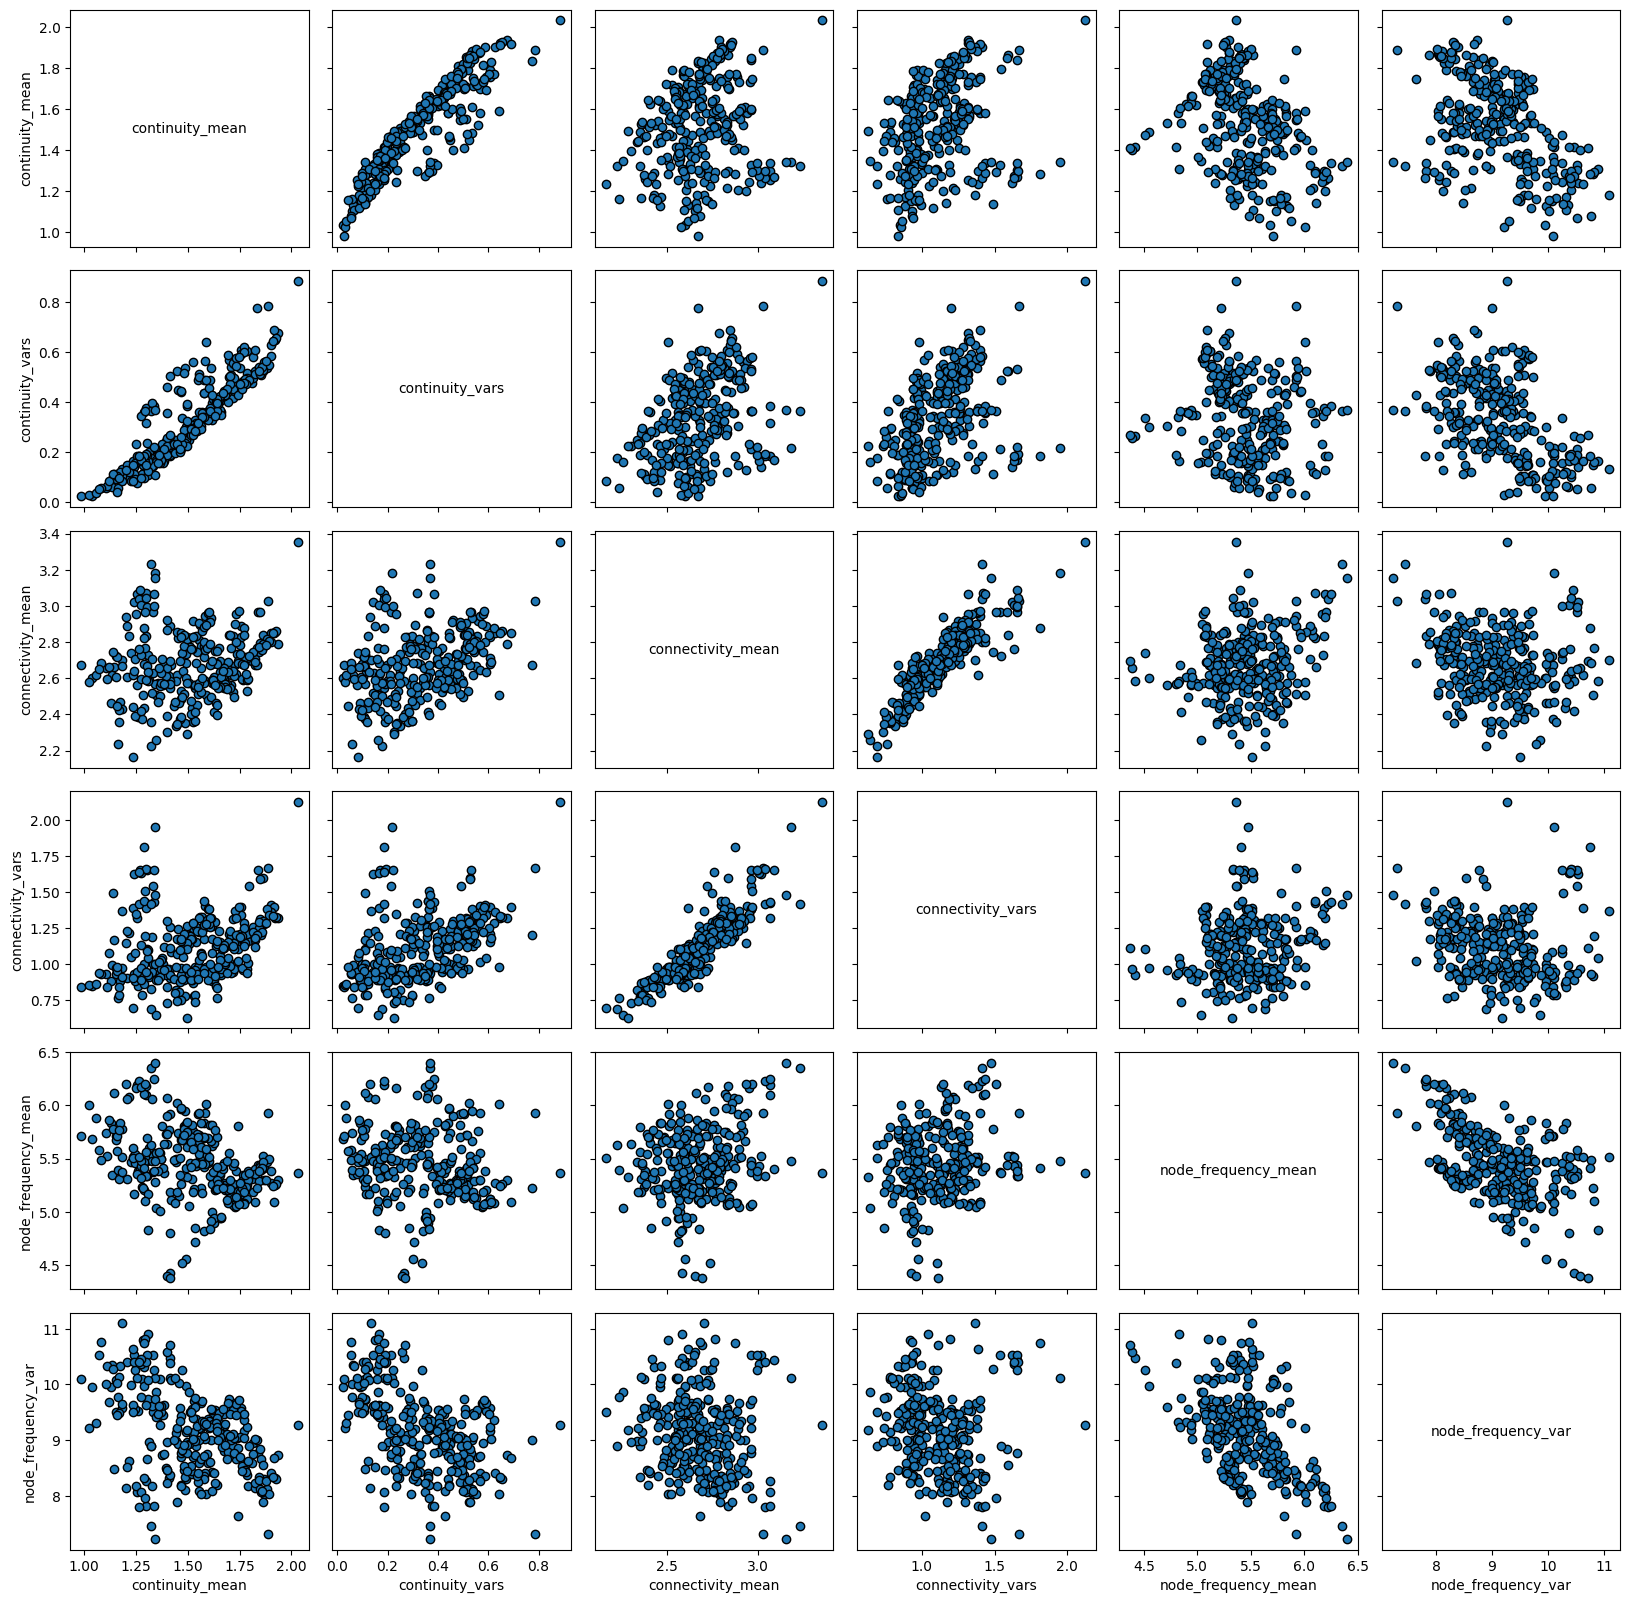

In [52]:
fig, axes = pairs_plotting.pairs_scatter(experiments_5555, outcomes_5555, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### Seed 6666

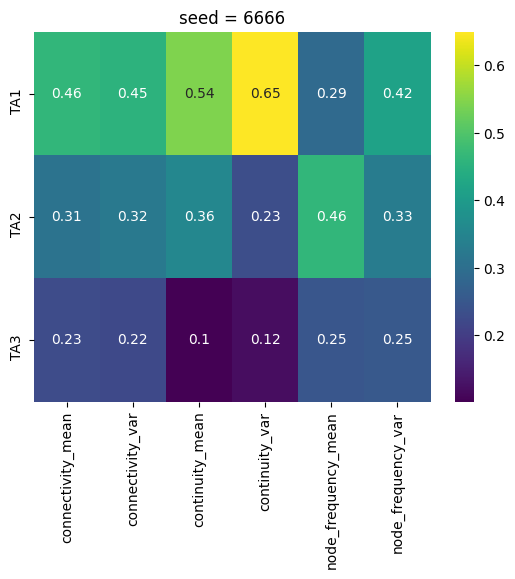

In [139]:
fs = feature_scoring.get_feature_scores_all(experiments_6666[['TA1', 'TA2', 'TA3']], outcomes_6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 6666")
plt.savefig('TA_ETRF_seed6666.png', bbox_inches='tight')

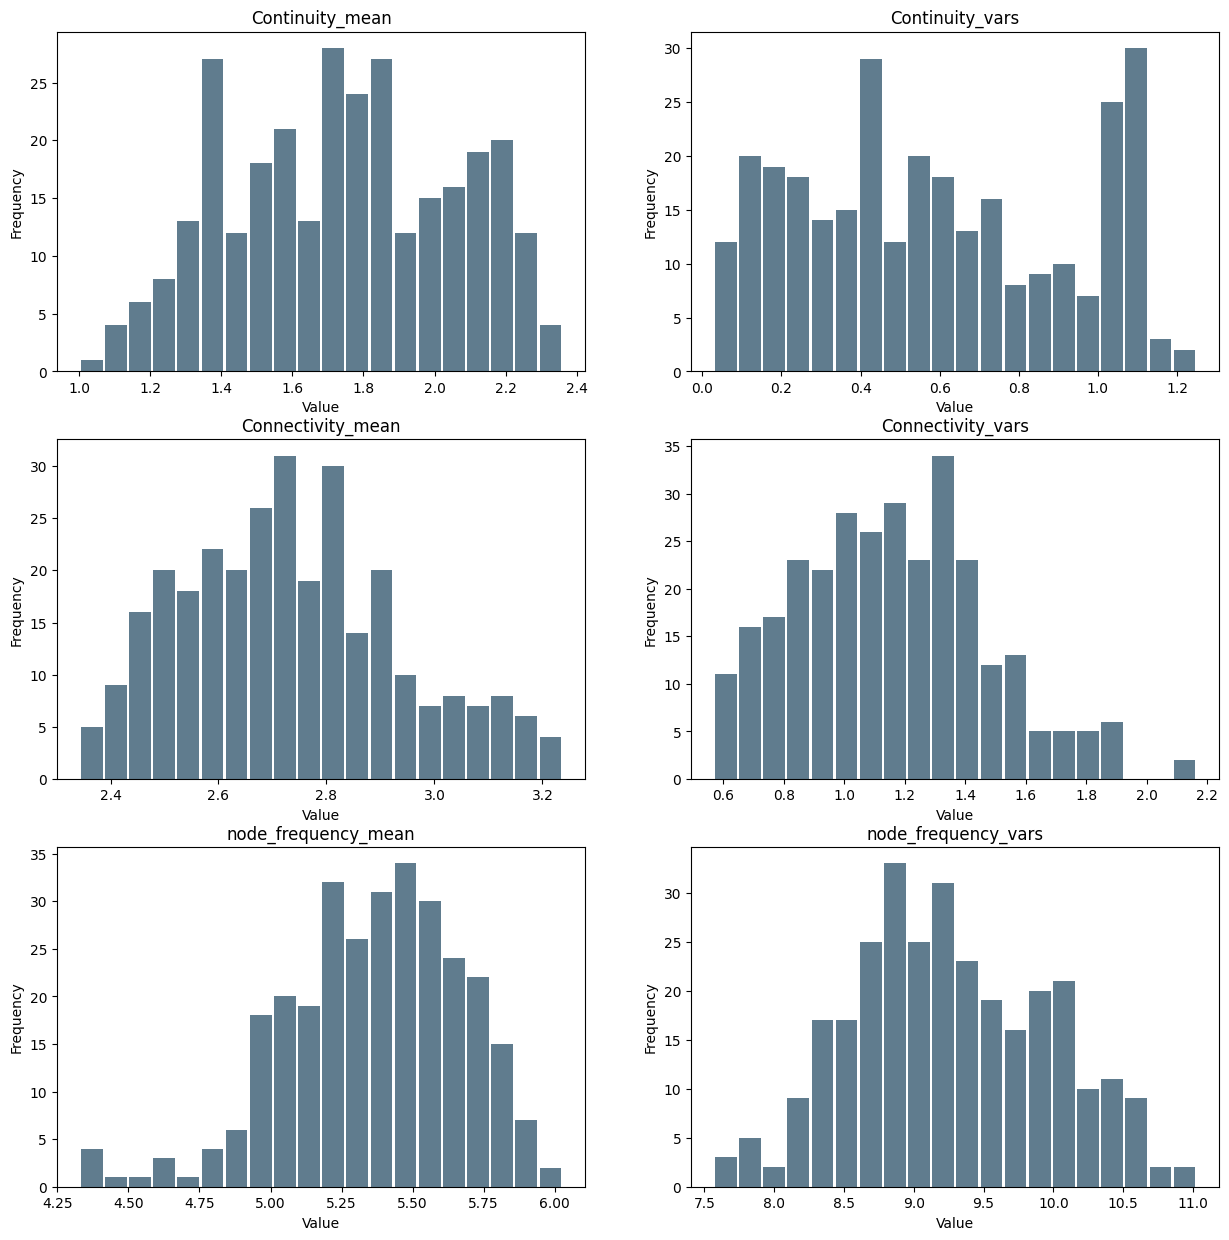

In [47]:
make_histogram_full(outcomes_6666)

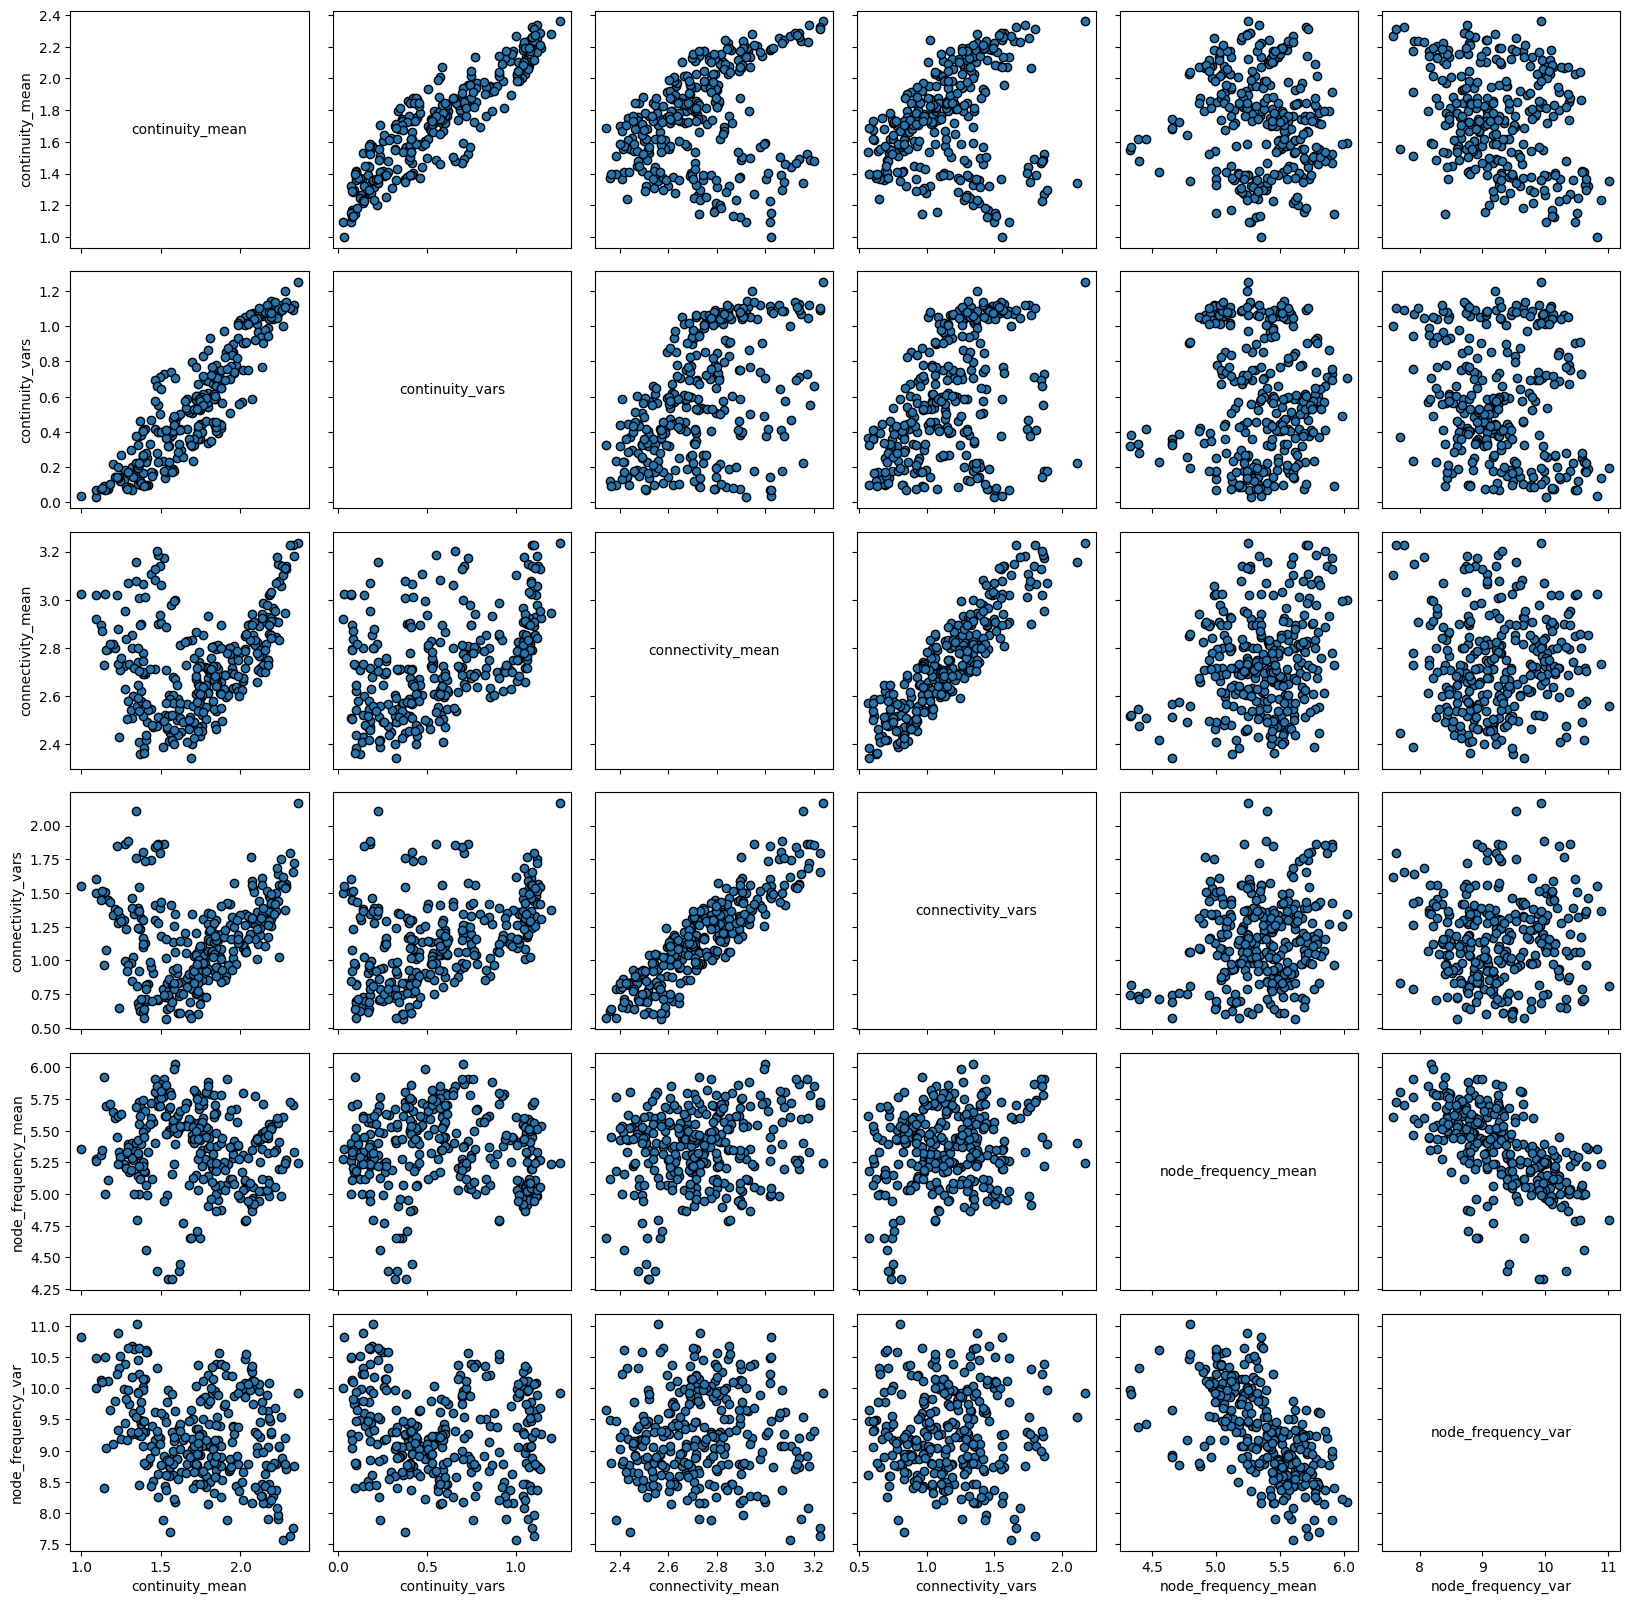

In [53]:
fig, axes = pairs_plotting.pairs_scatter(experiments_6666, outcomes_6666, legend=True)
fig.set_size_inches(20, 20)
plt.show()

# Combined results

### combining the outcomes and experiments

In [140]:
experiments_2222['seed']=2222
experiments_3333['seed']=3333
experiments_4444['seed']=4444
experiments_5555['seed']=5555
experiments_6666['seed']=6666


In [141]:
experiments_combined = pd.concat([experiments_2222, experiments_3333, experiments_4444, experiments_5555, experiments_6666], ignore_index=True, sort=False)

In [142]:
outcomes_2222_pd = pd.DataFrame.from_dict(outcomes_2222)
outcomes_3333_pd = pd.DataFrame.from_dict(outcomes_3333)
outcomes_4444_pd = pd.DataFrame.from_dict(outcomes_4444)
outcomes_5555_pd = pd.DataFrame.from_dict(outcomes_5555)
outcomes_6666_pd = pd.DataFrame.from_dict(outcomes_6666)


In [143]:
outcomes_combined = pd.concat([outcomes_2222_pd, outcomes_3333_pd, outcomes_4444_pd, outcomes_5555_pd, outcomes_6666_pd], ignore_index=True, sort=False)

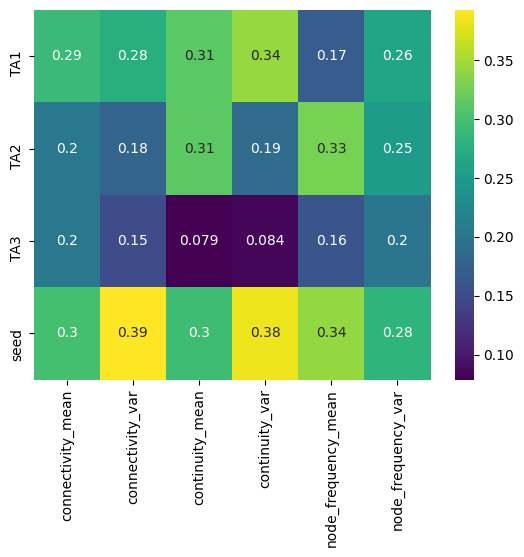

In [144]:
fs = feature_scoring.get_feature_scores_all(experiments_combined[['TA1', 'TA2', 'TA3', 'seed']], outcomes_combined)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF.png', bbox_inches='tight')

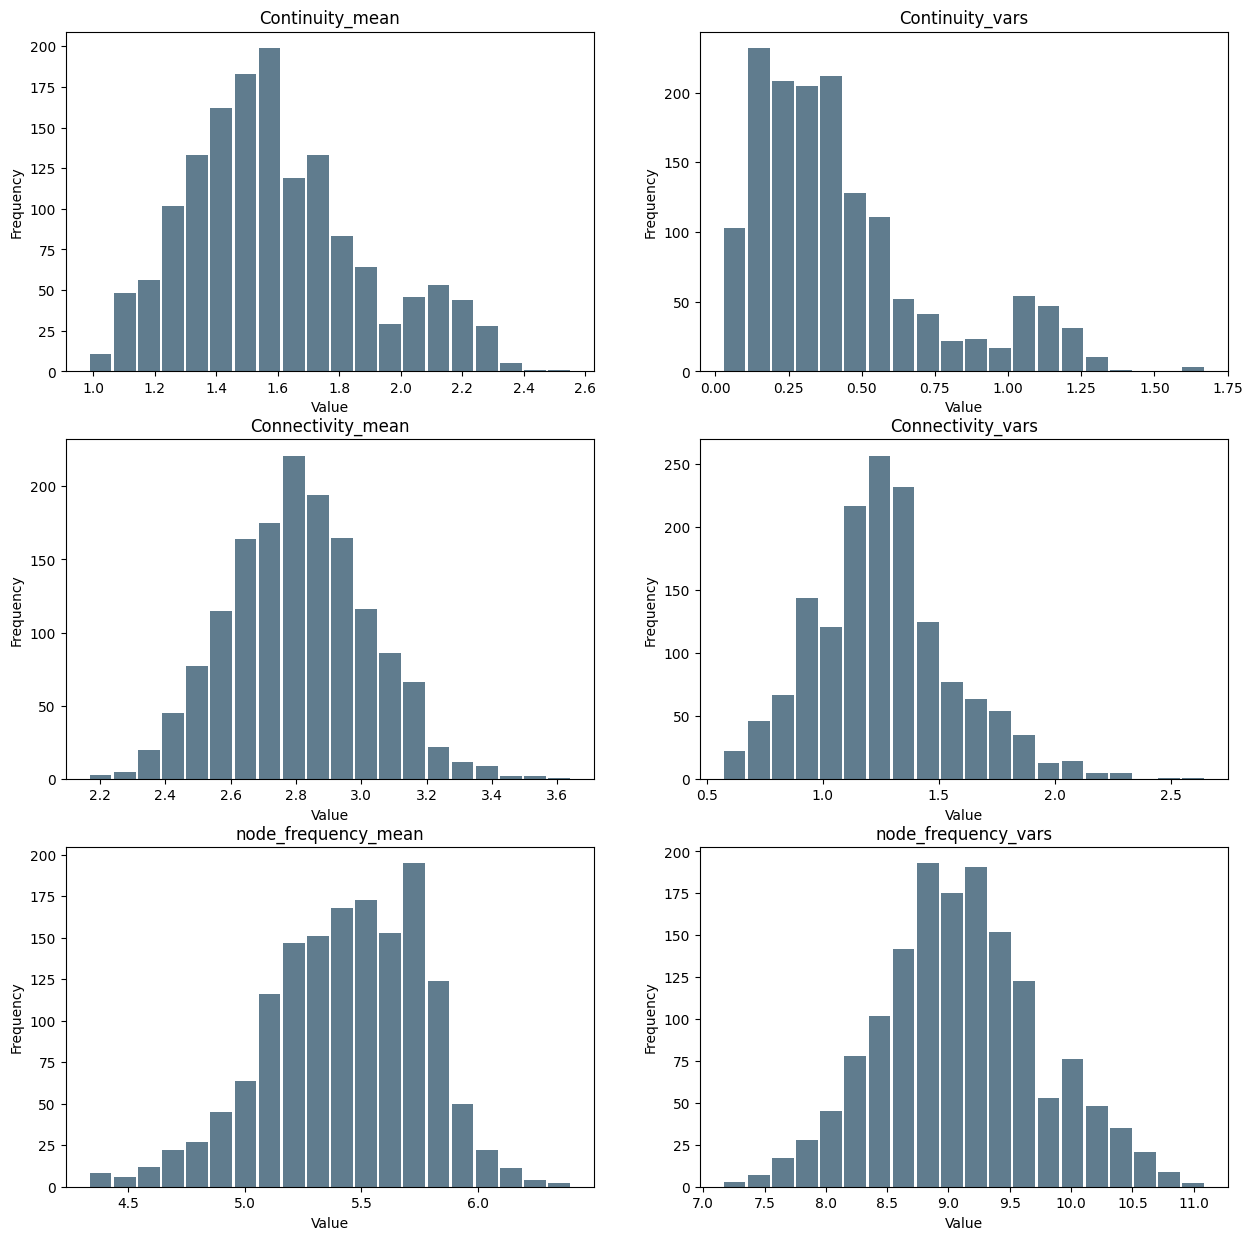

In [48]:
make_histogram_full(outcomes_combined)

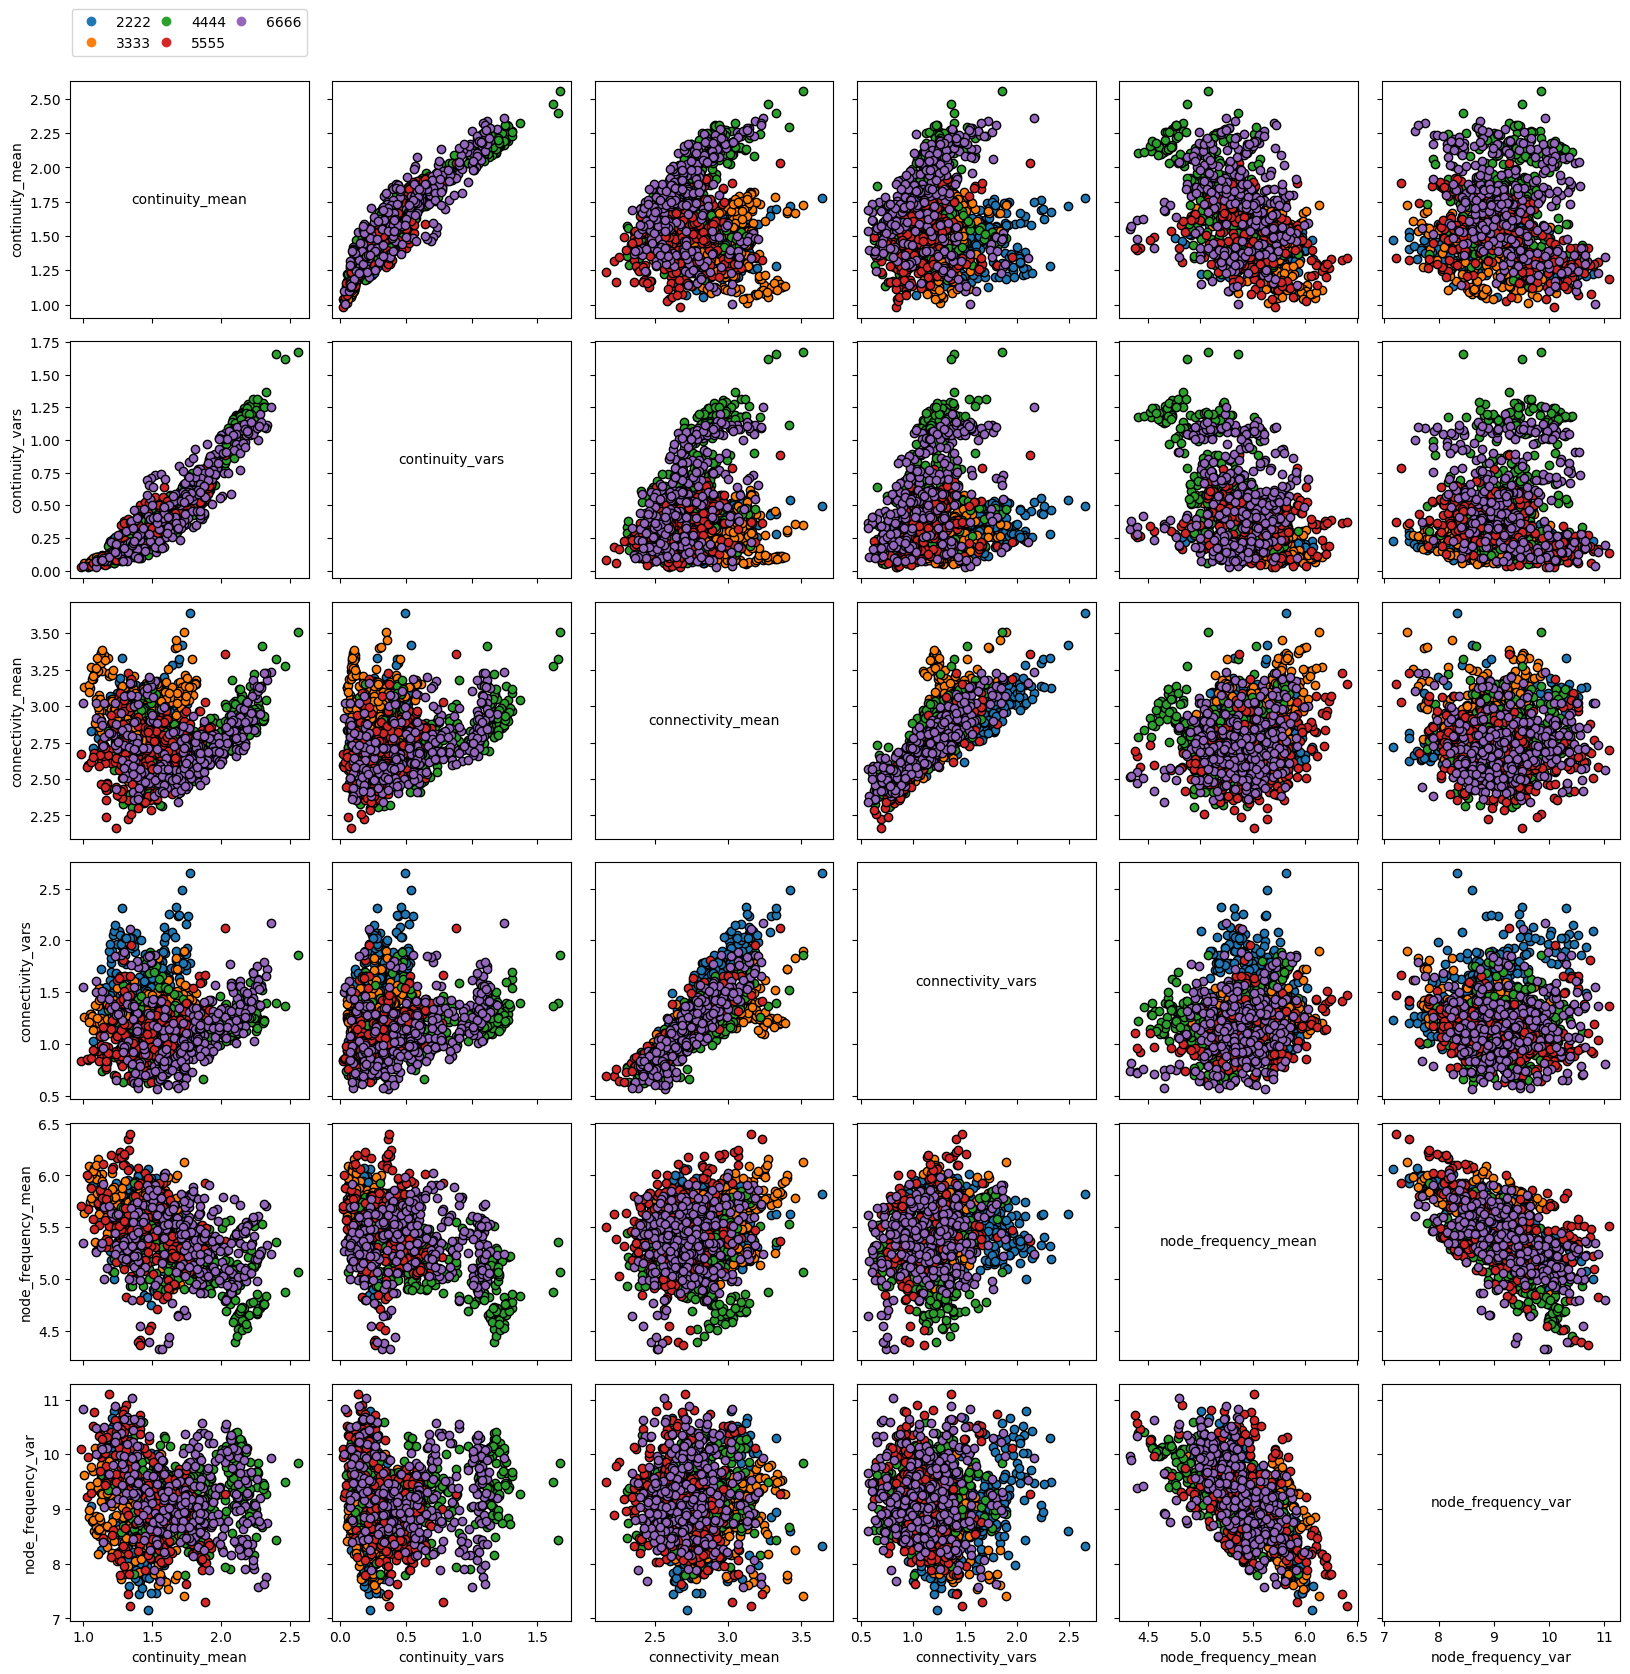

In [57]:
fig, axes = pairs_plotting.pairs_scatter(experiments_combined, outcomes_combined, group_by='seed', grouping_specifiers = {2222: 2222, 3333:3333, 4444:4444, 5555:5555, 6666:6666}, legend=True)
fig.set_size_inches(20, 20)
plt.show()

# Correlation

In [145]:
for key in outcomes_combined.keys():
    experiments_combined[key] = outcomes_combined.get(key)

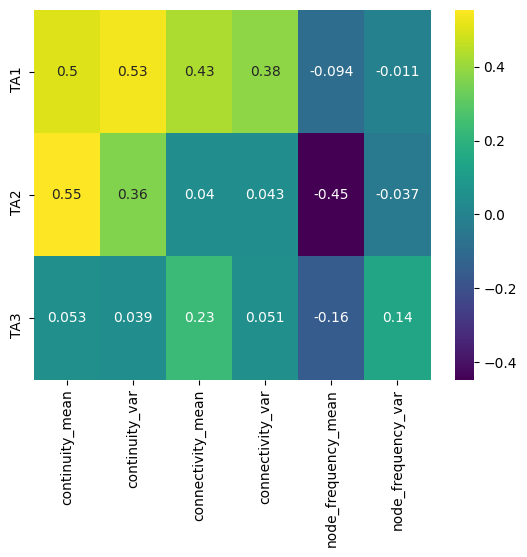

In [151]:
correlation_mat = experiments_combined[['TA1', 'TA2', 'TA3','continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']].corr()
corr_mat = correlation_mat[['TA1', 'TA2', 'TA3']].loc[['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']]
sns.heatmap(corr_mat.T, cmap="viridis", annot = True)
plt.savefig('TA_correlation.png', bbox_inches='tight')